In [8]:
import io
from PIL import Image as PilImage, ImageDraw
import json

# Google APIs
from google.cloud import vision
from google.cloud.vision import types

from IPython.core.display import Image, display

from doctools import *
from doc_image_tools import *

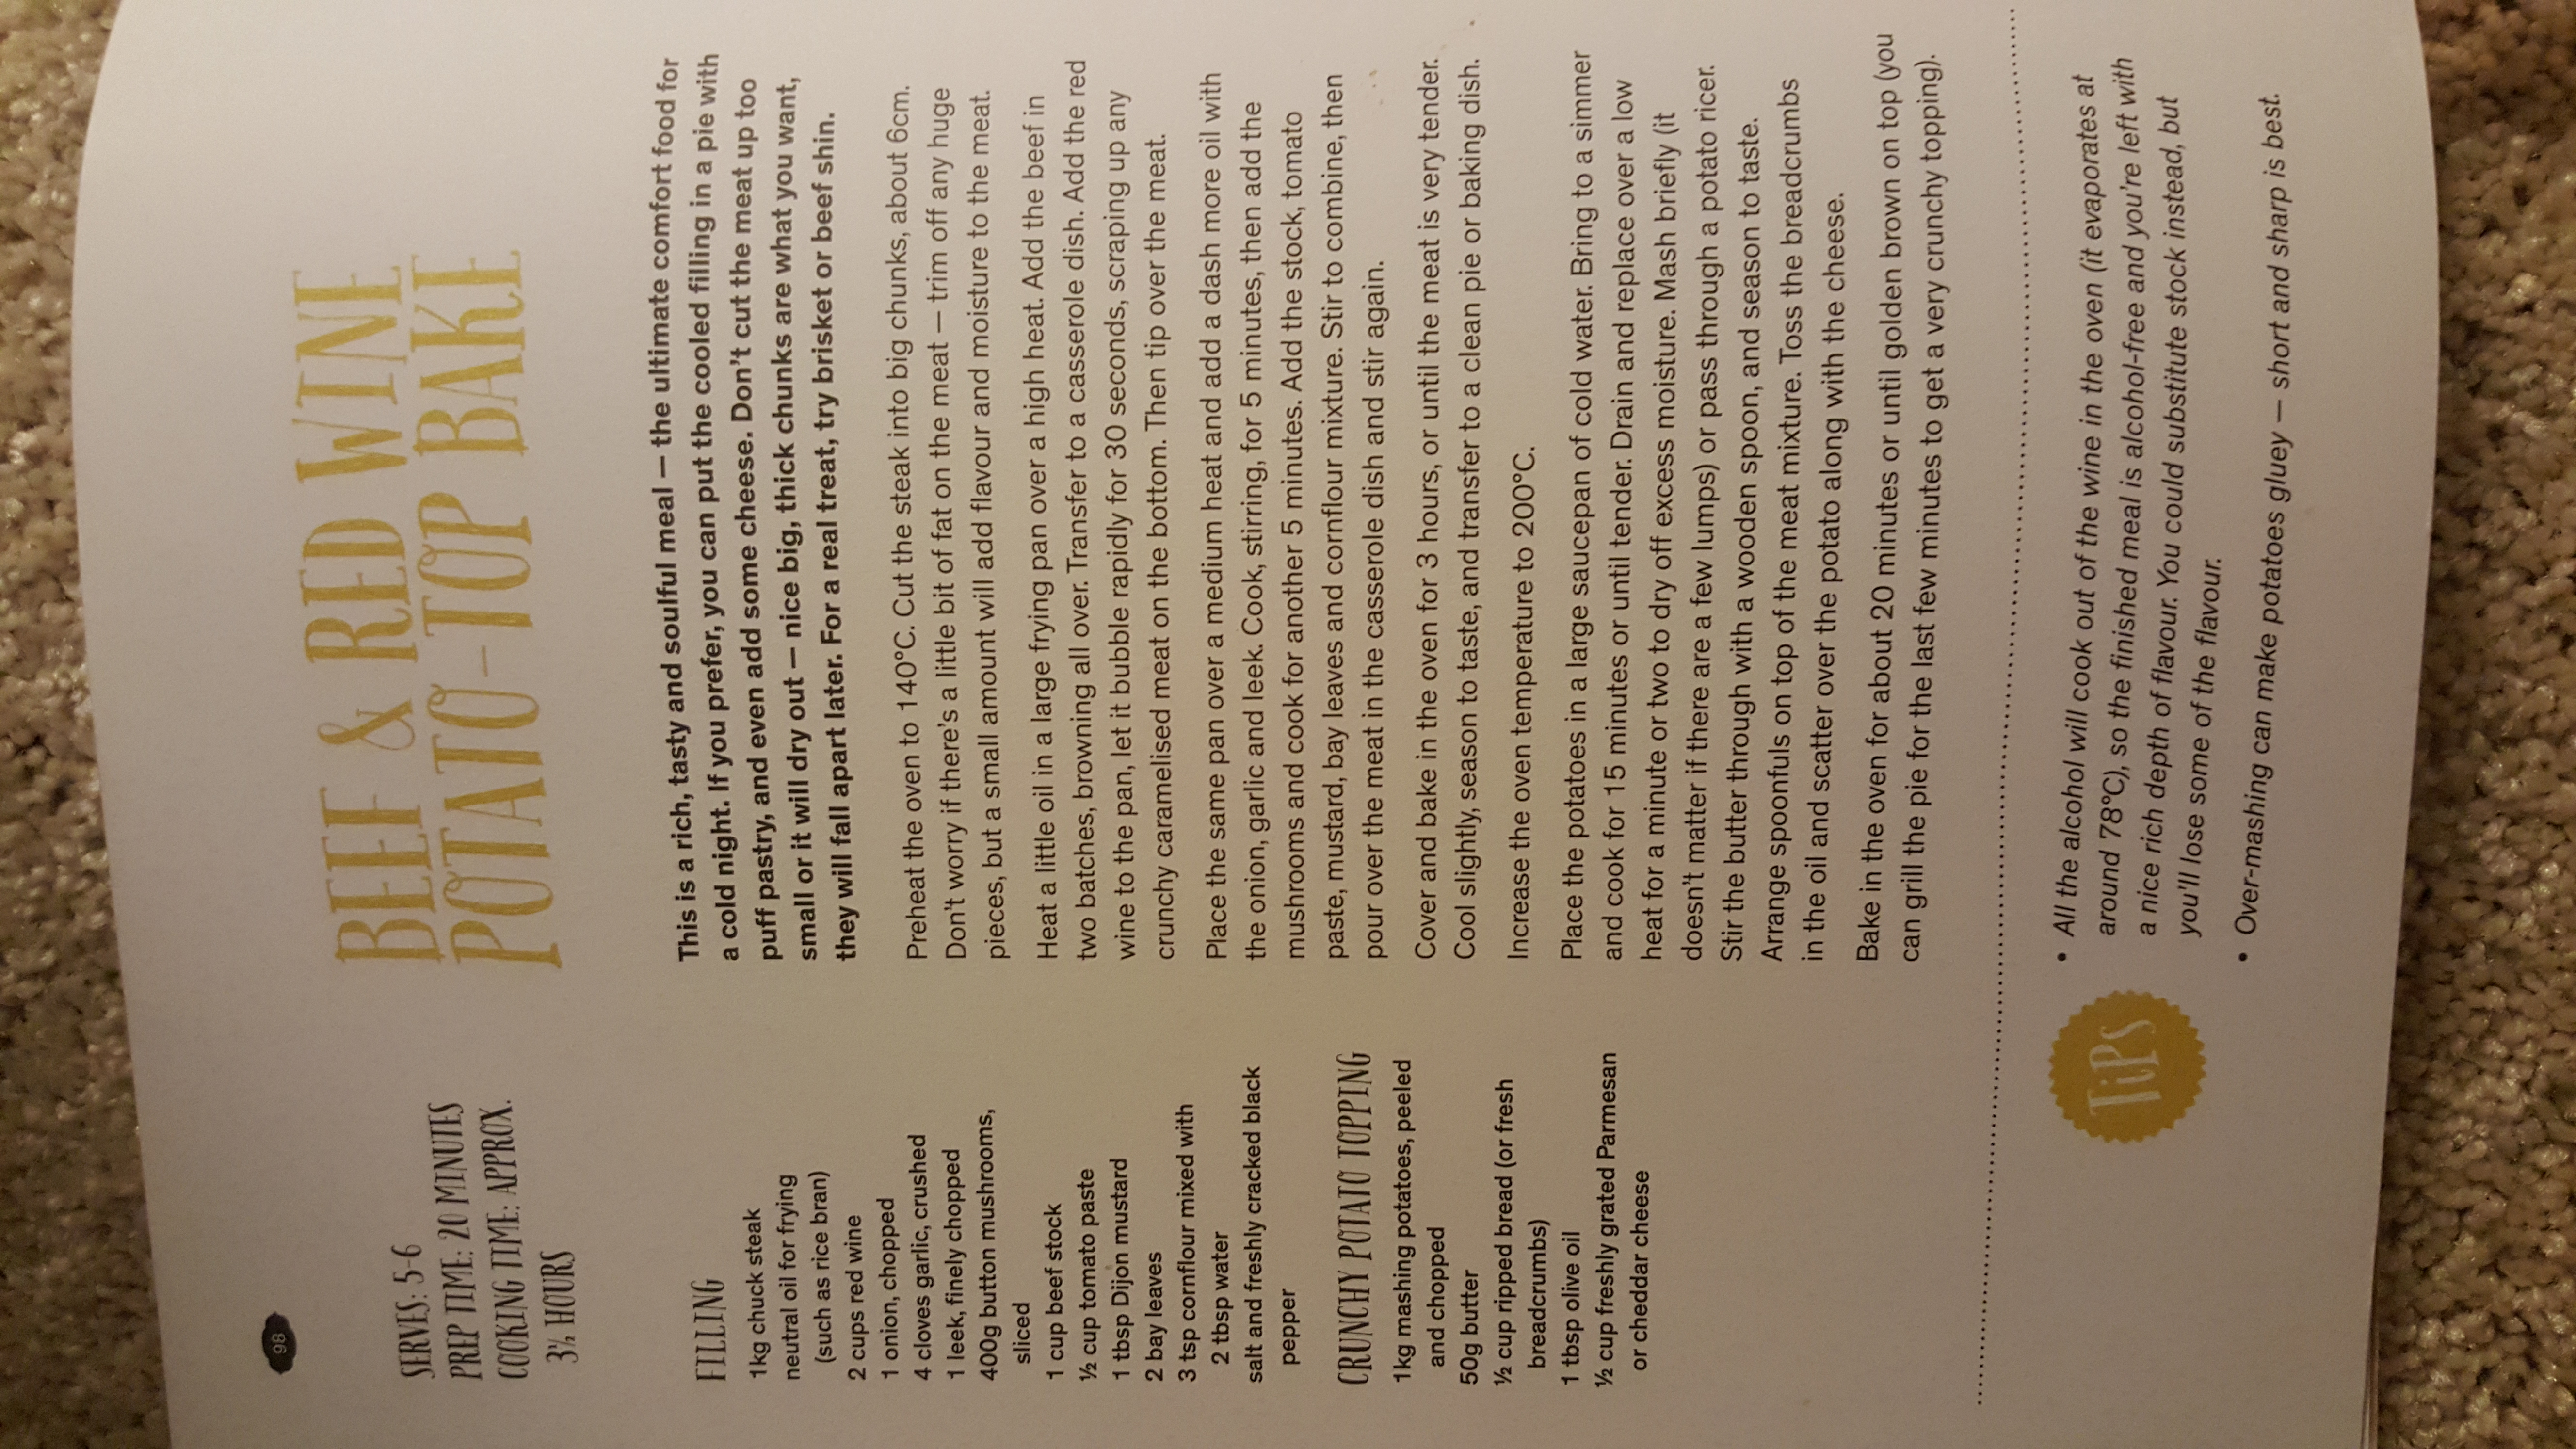

In [18]:
# Some config
#image_file_name = "cajun-potato-salad.jpg"
#image_file_name = "cauliflower-soup.jpg"
#image_file_name = "https://s3-eu-west-1.amazonaws.com/recipe-net/content_source/20180313_162305.jpg"
image_file_name = "https://s3-eu-west-1.amazonaws.com/recipe-net/content_source/20180311_205630.jpg"

client = vision.ImageAnnotatorClient()

display(Image(image_file_name))
 
def get_document_from_url(url):
    """Sends the image to Google Vision API to get the annotations"""
    source = types.ImageSource(image_uri=url)
    image = types.Image(source=source)
    response = client.document_text_detection(image=image)
    document = response.full_text_annotation
    return document   

def get_document_from_image(filein):
    """Sends the image to Google Vision API to get the annotations"""
    image = types.Image(content=content)
    response = client.document_text_detection(image=image)
    document = response.full_text_annotation
    return document

document = get_document_from_url(image_file_name)

In [6]:
# Read image file
display(Image(image_file_name))
with io.open(image_file_name, 'rb') as image_file:
    content = image_file.read()




In [15]:
#document = get_document_from_image(content)
document = get_document_from_image(image_file_name)
image_with_bounds = render_doc_text(image_file_name, document)
display(image_with_bounds)

symbol_bounds, word_bounds, para_bounds, block_bounds, page_bounds = get_document_bounds(document)
display(len(block_bounds))
display(len(word_bounds))
display(len(para_bounds))
display(len(page_bounds))

NameError: name 'content' is not defined

In [19]:

para_texts = get_para_texts_from_doc(document)
display(para_texts)
#display(text)
#display(document.pages[0].blocks[0].paragraphs[0].words[0].symbols[0].text)
#display(document.pages[0].blocks[0].paragraphs[0].words)

['98\n',
 'SERVES: 5-6\nPRIP TIME: 20 MINUTES\nCOOKING TIME: APPROX\n3% HOURS\n',
 'BEEF & RED WINE\nPOTATO-TUP BAKE\n',
 "This is a rich, tasty and soulful meal - the ultimate comfort food\na cold night. If you prefer, you can put the cooled filling in a pie...\npuff pastry, and even add some cheese. Don't cut the meat un\nsmall or it will dry out - nice big, thick chunks are what you want.\nthey will fall apart later. For a real treat, try brisket or beef shin.\n",
 'FILLING\n1kg chuck steak\nneutral oil for frying\n',
 '(such as rice bran)\n2 cups red wine\n1 onion, chopped\n4 cloves garlic, crushed\n1 leek, finely chopped\n400g button mushrooms,\n',
 'sliced\n1 cup beef stock\n1/2 cup tomato paste\n1 tbsp Dijon mustard\n2 bay leaves\n3 tsp cornflour mixed with\n',
 '2 tbsp water\nsalt and freshly cracked black\npepper\n',
 "Preheat the oven to 140°C. Cut the steak into big chunks, about 6cm.\nDon't worry if there's a little bit of fat on the meat - trim off any huge\npieces, but a 

In [9]:
for para_text_index in range(0, len(para_texts)):
    with open("paras/para_{}.txt".format(para_text_index), "w") as text_file:
        text_file.write(para_texts[para_text_index])

In [55]:
para_texts = []

# Process each page
for page in document.pages:
    # Process each block in the page
    for block in page.blocks:
        # Process each paragraph in the block
        for para in block.paragraphs:
            # Process each word in the paragraph
            para_text = ""
            for word in para.words:
                # Process each symbol in the word
                for symbol in word.symbols:
                    # Process the symbol
                    para_text += symbol.text

                    # Check for breaks
                    if symbol.property.detected_break.type == types.TextAnnotation.DetectedBreak.SPACE:
                        para_text += " "

                    if symbol.property.detected_break.type == types.TextAnnotation.DetectedBreak.SURE_SPACE:
                        para_text += " "

                    if symbol.property.detected_break.type == types.TextAnnotation.DetectedBreak.EOL_SURE_SPACE:
                        para_text += "\n"

                    if symbol.property.detected_break.type == types.TextAnnotation.DetectedBreak.LINE_BREAK:
                        para_text += "\n"
                        # display(symbol.property.detected_break)
            # Para finished
            para_texts.append((para_text))

display(para_texts)

['Prep time: 15 minutes\nCooking time: 40 minutes\nServes: 6\n',
 'Dreamy Cauliflower Soup\n',
 "The cauliflower is a gloriously humble vegetable with a wonderful\nsubtle creamy flavour that definitely brings its A-game when\nIt's turned into a soup. This is a seriously simple midweek meal\nsolution whereby dinner will be on the table in under an hour. It's\nSo sumptuous to eat that it distracts little people from the fact the\nsoup is made almost entirely of veges. It's also such an impressive\ndish that it lends itself perfectly to serving as an entrée when\nyou have guests over have it ready to go in the fridge and just\nfreshen it up with herbs and splashes of cream before serving.\n",
 '50g butter\n2 tbsp extra virgin olive oil\n1 large onion, chopped\n1 leek, chopped\n2 stalks celery, chopped\n2 tsp chopped fresh thyme or\n',
 'sage\n4 cloves garlic, roughly\n',
 'chopped\n1kg cauliflower, washed and\n',
 'finely chopped\n5 cups reduced-salt chicken or\n',
 'vegetable stock\n1 ts